In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.transforms as T

In [2]:
# Created modules
import visualization_utils as vu
import train_utils as tu
import model_utils as mu

import imp
imp.reload(mu)
imp.reload(tu)

<module 'train_utils' from '/Users/intanmaharani/Desktop/Semester I August 2022/IF5171 - Pembelajaran Mesin DSAI/Deep Learning/Praktikum_Mandiri/Project1/deliverables/train_utils.py'>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 0. Defining Costants

In [4]:
DATA_DIR = "../data"
MODEL_DIR = "models"

EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 1e-3

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
## Create the directory to store the model if not exists
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [6]:
# Plotting Helper Function
def plot_acc_epoch(epochs, train_acc, test_acc):
    l = range(1,epochs+1)
    N = len(l)
    l2 = np.arange(N)
    plt.subplots(figsize=(10, 5))
    plt.plot(l2, test_acc, label="Testing Accuracy")
    plt.plot(l2, train_acc, label="Training Accuracy")
    plt.xticks(l2,l)
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title('Accuracy versus Epoch CNN Model', fontsize=12)
    plt.show()

## 1. Dataset Preparation - SVHN for Training and MNIST for Testing

In [7]:
# Load dataset
training_data = datasets.SVHN(
    root=DATA_DIR,
    split='train',
    download=True,
    transform = T.Compose([
        T.Resize((28,28)),
        T.Grayscale(),
        T.ToTensor(),
        T.Normalize([0.5],[0.5])
    ])
)
test_data = datasets.MNIST(
    root=DATA_DIR, 
    train=False, 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

Using downloaded and verified file: ../data/train_32x32.mat


In [8]:
# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

Show the MNIST dataset

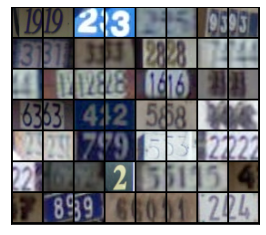

In [9]:
grid_tr = vu.set_grid(train_dataloader.dataset.data, num_cells=56)
vu.show(grid_tr)

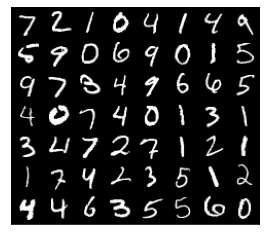

In [10]:
grid_ts = vu.set_grid(test_dataloader.dataset.data, num_cells=56)
vu.show(grid_ts)

In this case study, both training data and test data are from the same domain - MNIST datasets. Therefore, as we can see, both data are quite similar in terms of its representation.

# 2. Modeling

The model that will be used is **CNN** or Convolutional Neural Network.

For the loss/objective function, **Cross Entropy Loss** will be used. This loss function is used mainly because in our training, model weights will be adjusted in every epoch.

For the optimizer, **Adam** will be used in the model development.

### 2.1. Create the model

In [11]:
print(f"Using {DEVICE} device")

# Define model
cnn = mu.ConvNet(d_out=10).to(DEVICE) # Use CovNet for MNIST
print(cnn)

# Persistent file to store the model
model_path_adam = os.path.join(MODEL_DIR, "cnn_mnist_svhn_adam.pth")

Using cpu device
ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### 2.2. Define the loss function and the optimizers

In [12]:
# Loss function: Cross Entropy Loss or Log Loss
loss_fn = nn.CrossEntropyLoss()

In [15]:
# # Optimizer 1: Stochastic Gradient Descent (SGD)
# optimizer1 = optim.SGD(
#     cnn.parameters(), 
#     lr=LEARNING_RATE
# )

In [13]:
# Optimizer 2: Adam
optimizer2 = optim.Adam(
    cnn.parameters(), 
    lr=LEARNING_RATE
)

### 2.3. Execute the training for both experiments
Experiment #1: using SGD as optimizer

Experiment #2: using Adam as optimizer

with **10** epochs for each experiment, **64** batch size, and **0.001** learning rate

#### 2.3.1. Using Adam as optimizer

In [14]:
test_accuracy_adam = []
train_accuracy_adam = []
for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train(train_dataloader, cnn, loss_fn, optimizer2)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    print("Test Set Error:")
    acc_test = tu.test(test_dataloader, cnn, loss_fn)
    print("\nTrain Set Error:")
    acc_train = tu.test(train_dataloader, cnn, loss_fn)
    test_accuracy_adam.append(acc_test)
    train_accuracy_adam.append(acc_train)
    
    # Save model
    torch.save(cnn.state_dict(), model_path_adam)
    print(f"Model {model_path_adam} stored!")
    
print("Done!")

Epoch 1 out of 10
 ------------
Loss: 2.298208 [    0]/73257
Loss: 1.493425 [ 6400]/73257
Loss: 0.782529 [12800]/73257
Loss: 0.661902 [19200]/73257
Loss: 0.527480 [25600]/73257
Loss: 0.559309 [32000]/73257
Loss: 0.407596 [38400]/73257
Loss: 0.835042 [44800]/73257
Loss: 0.560320 [51200]/73257
Loss: 0.415149 [57600]/73257
Loss: 0.591371 [64000]/73257
Loss: 0.574656 [70400]/73257
 > Training time: 162.10 seconds
Test Set Error:
Test Error: 
 Accuracy: 56.0%, Avg loss: 2.122225 


Train Set Error:
Test Error: 
 Accuracy: 87.8%, Avg loss: 0.420086 

Model models/cnn_mnist_svhn_adam.pth stored!
Epoch 2 out of 10
 ------------
Loss: 0.346479 [    0]/73257
Loss: 0.423890 [ 6400]/73257
Loss: 0.518599 [12800]/73257
Loss: 0.430660 [19200]/73257
Loss: 0.362637 [25600]/73257
Loss: 0.462482 [32000]/73257
Loss: 0.318983 [38400]/73257
Loss: 0.719875 [44800]/73257
Loss: 0.408850 [51200]/73257
Loss: 0.279116 [57600]/73257
Loss: 0.444184 [64000]/73257
Loss: 0.420202 [70400]/73257
 > Training time: 162.96

**Experiment** result: from the above training and testing executions, it can be seen that the accuracy of the CNN model with Adam optimizer (10 epochs, 64 batch size, and 0.001 learning rate) is 57.4%.

##### 2.3.1.1. Plotting Training Accuracy vs Test Accuracy

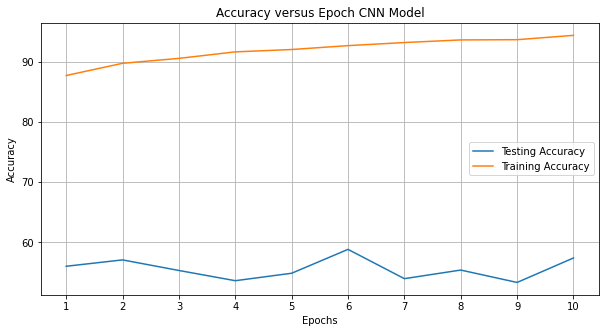

In [16]:
plot_acc_epoch(EPOCHS, train_accuracy_adam, test_accuracy_adam)

It can be seen from the plot above that CNN with Adam optimizer performs really good, however, it is slightly overfitting the training set.